In [23]:
import os
import json
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
BASE_DIR = "data"


In [25]:
def process_json_files(base_dir="data"):
    submissoes = []

    if not os.path.exists(base_dir):
        print(f"Diretório {base_dir} não encontrado.")
        return pd.DataFrame()

    for root, _, files in os.walk(base_dir):
        for file in files:
            if file.endswith(".json"):
                file_path = os.path.join(root, file)
                try:
                    with open(file_path, "r", encoding="utf-8") as f:
                        content = json.load(f)

                    submission = content.get("data", {}).get("submissionDetails", {})

                    if not submission or not submission.get("code"):
                        print(f"JSON ignorado: {file_path} - Dados insuficientes ou código ausente.")
                        continue
                    
                    path_parts = root.split(os.sep)
                    difficulty = path_parts[2]  
                    model = path_parts[4]
                    problem_slug = submission.get("question", {}).get("titleSlug", "")
                    language = submission.get("lang", {}).get("name", "")
                    status_code = submission.get("statusCode", None)
                    total_correct = submission.get("totalCorrect", 0)
                    total_tests = submission.get("totalTestcases", 0)
                    runtime = submission.get("runtime", None)
                    memory = submission.get("memory", None)
                    timestamp = submission.get("timestamp", None)
                    code = submission.get("code", "")

                    submissoes.append({
                        "model": model,
                        "difficulty": difficulty,
                        "problem": problem_slug,
                        "language": language,
                        "status_code": status_code,
                        "total_correct": total_correct,
                        "total_tests": total_tests,
                        "runtime": runtime,
                        "memory": memory,
                        "timestamp": datetime.fromtimestamp(timestamp) if timestamp else None,
                        "code": code,
                        "source_file": file_path
                    })

                except Exception as e:
                    print(f"Erro ao processar {file_path}: {e}")

    return pd.DataFrame(submissoes)


In [26]:
df = process_json_files()
print(f"Total de submissões processadas: {len(df)}")
df.head()


JSON ignorado: data\marcelo_problems\hard\25_reverse-nodes-in-k-group\claude\25_reverse-nodes-in-k-group_C.json - Dados insuficientes ou código ausente.
JSON ignorado: data\marcelo_problems\hard\25_reverse-nodes-in-k-group\claude\25_reverse-nodes-in-k-group_Py.json - Dados insuficientes ou código ausente.
JSON ignorado: data\marcelo_problems\hard\25_reverse-nodes-in-k-group\deepseek\25_reverse-nodes-in-k-group_C.json - Dados insuficientes ou código ausente.
JSON ignorado: data\marcelo_problems\hard\25_reverse-nodes-in-k-group\deepseek\25_reverse-nodes-in-k-group_Py.json - Dados insuficientes ou código ausente.
JSON ignorado: data\marcelo_problems\hard\25_reverse-nodes-in-k-group\gpt\25_reverse-nodes-in-k-group_C.json - Dados insuficientes ou código ausente.
JSON ignorado: data\marcelo_problems\hard\25_reverse-nodes-in-k-group\gpt\25_reverse-nodes-in-k-group_Py.json - Dados insuficientes ou código ausente.
JSON ignorado: data\marcelo_problems\hard\30_substring-with-concatenation-of-all-

,model,difficulty,problem,language,status_code,total_correct,total_tests,runtime,memory,timestamp,code,source_file
0,claude,easy,best-time-to-buy-and-sell-stock,c,10,212.0,212,0,15220000,2025-06-01 22:20:50,#include <stdio.h>\n#include <stdlib.h>\n\n// ...,data\henrique_problems\easy\121_best-time-to-b...
1,claude,easy,best-time-to-buy-and-sell-stock,python3,10,212.0,212,80,19284000,2025-06-01 22:23:55,class Solution(object):\n def maxProfit(sel...,data\henrique_problems\easy\121_best-time-to-b...
2,deepseek,easy,best-time-to-buy-and-sell-stock,c,10,212.0,212,0,15312000,2025-06-01 22:21:22,#include <stdio.h>\n#include <limits.h>\n\nint...,data\henrique_problems\easy\121_best-time-to-b...
3,deepseek,easy,best-time-to-buy-and-sell-stock,python3,10,212.0,212,24,18992000,2025-06-01 22:24:39,class Solution(object):\n def maxProfit(sel...,data\henrique_problems\easy\121_best-time-to-b...
4,gpt,easy,best-time-to-buy-and-sell-stock,c,10,212.0,212,0,15372000,2025-06-01 22:19:44,#include <stdio.h>\n\nint maxProfit(int* price...,data\henrique_problems\easy\121_best-time-to-b...


In [27]:

df['full_acceptance'] = df['total_correct'] == df['total_tests']
df['partial_acceptance'] = df['total_correct'] >= (df['total_tests'] * 0.5)
df['rejected'] = df['total_correct'] < (df['total_tests'] * 0.5)

       model difficulty language  total_submissions  full_accept_rate  \
0     claude       easy        c                 15          0.800000   
1     claude       easy  python3                 15          0.866667   
2     claude       hard        c                 10          1.000000   
3     claude       hard  python3                 10          1.000000   
4     claude     medium        c                 15          0.933333   
5     claude     medium  python3                 15          0.866667   
6   deepseek       easy        c                 15          0.800000   
7   deepseek       easy  python3                 15          1.000000   
8   deepseek       hard        c                 10          0.900000   
9   deepseek       hard  python3                 10          1.000000   
10  deepseek     medium        c                 15          0.933333   
11  deepseek     medium  python3                 15          1.000000   
12       gpt       easy        c                 15

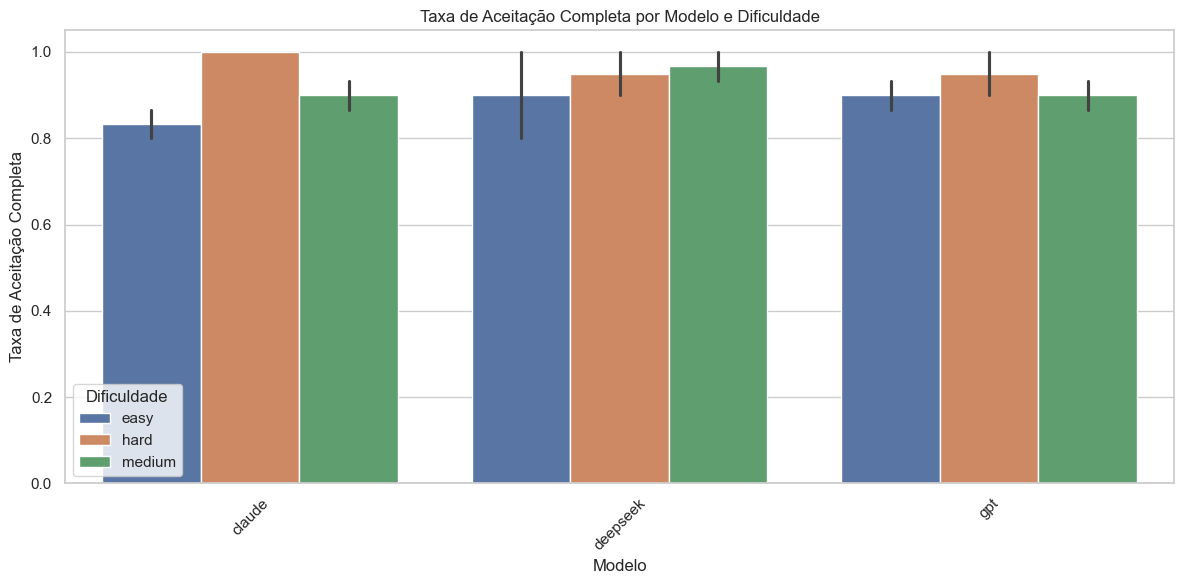

In [28]:
summary = df.groupby(['model', 'difficulty', 'language']).agg(
    total_submissions=('full_acceptance', 'count'),
    full_accept_rate=('full_acceptance', 'mean'),
    partial_accept_rate=('partial_acceptance', 'mean'),
    avg_runtime_ms=('runtime', 'mean'),
    avg_memory_bytes=('memory', 'mean')
).reset_index()

print(summary)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=summary, x='model', y='full_accept_rate', hue='difficulty')
plt.title('Taxa de Aceitação Completa por Modelo e Dificuldade')
plt.xlabel('Modelo')
plt.ylabel('Taxa de Aceitação Completa')
plt.xticks(rotation=45)
plt.legend(title='Dificuldade')
plt.tight_layout()
plt.show()